# ML_VISION_Final Project : CAPTCHA SOLVER

# POUYA AHADI 400123014 pa@ieee.org 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os

In [ ]:
  # Dataset
!gdown --id "1yqBQa-WXQTiNBWqLvuRyHkNY-JyJ8f3z"
  # test
!gdown --id "1cPPDc2SN6aYf8MCIdHe6S4kr-V-NnpQp"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yqBQa-WXQTiNBWqLvuRyHkNY-JyJ8f3z
To: /content/Dataset.zip
100% 30.6M/30.6M [00:00<00:00, 50.6MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cPPDc2SN6aYf8MCIdHe6S4kr-V-NnpQp
To: /content/test.zip
100% 280k/280k [00:00<00:00, 126MB/s]


In [ ]:
!unzip /content/Dataset.zip
!unzip /content/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/A_236.jpg       
  inflating: __MACOSX/Dataset/._A_236.jpg  
  inflating: Dataset/R_1903.jpg      
  inflating: __MACOSX/Dataset/._R_1903.jpg  
  inflating: Dataset/Y_822.jpg       
  inflating: __MACOSX/Dataset/._Y_822.jpg  
  inflating: Dataset/Y_2400.jpg      
  inflating: __MACOSX/Dataset/._Y_2400.jpg  
  inflating: Dataset/U_1594.jpg      
  inflating: __MACOSX/Dataset/._U_1594.jpg  
  inflating: Dataset/P_1011.jpg      
  inflating: __MACOSX/Dataset/._P_1011.jpg  
  inflating: Dataset/Y_2366.jpg      
  inflating: __MACOSX/Dataset/._Y_2366.jpg  
  inflating: Dataset/6_707.jpg       
  inflating: __MACOSX/Dataset/._6_707.jpg  
  inflating: Dataset/6_5.jpg         
  inflating: __MACOSX/Dataset/._6_5.jpg  
  inflating: Dataset/T_2937.jpg      
  inflating: __MACOSX/Dataset/._T_2937.jpg  
  inflating: Dataset/W_1538.jpg      
  inflating: __MACOSX/Dataset/._W_1538.jpg  
  inflating: Dataset/P_3606.jpg      
  in

In [ ]:
os.listdir()

['.config',
 'test.zip',
 '__MACOSX',
 'test',
 'Dataset.zip',
 'Dataset',
 'drive',
 'sample_data']

In [ ]:
path1 = f'Dataset//N_1551.jpg'
path2 = f'Dataset//C_190.jpg'

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

In [ ]:
img1 =cv2.resize(img1,(50,50))
img2 =cv2.resize(img2,(50,50))

In [ ]:
#Function for plotting two images
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')

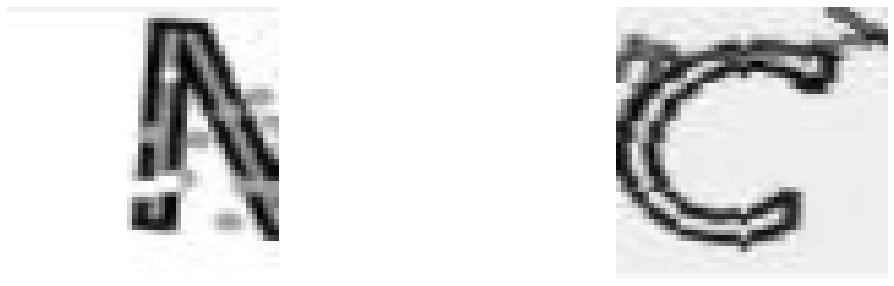

In [ ]:
plot_(img1, img2)

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

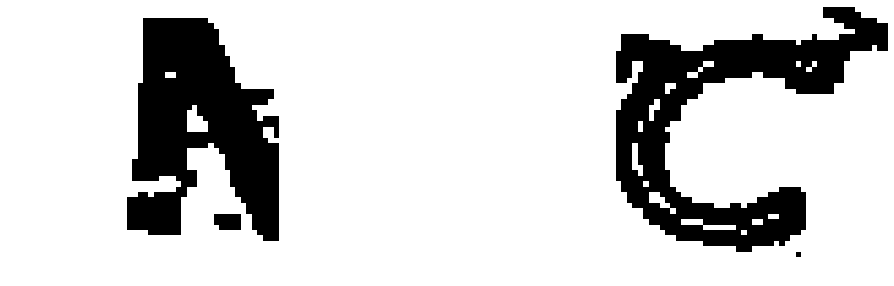

In [ ]:
plot_(thresh_img1, thresh_img2)

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((3,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((3,2), np.uint8))

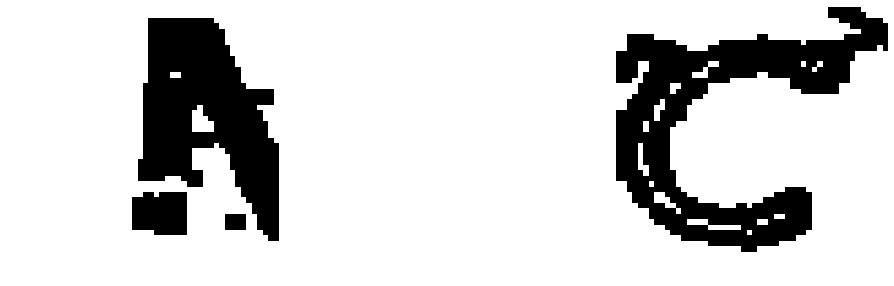

In [ ]:
plot_(close_img1, close_img2)

In [ ]:
def r_img (img,size) :
    return cv2.resize(img,size)
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((2,2), np.uint8))

#def d_img (img) :
#   return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [ ]:
import os
from PIL import Image

In [ ]:
path = './Dataset/'

In [ ]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(path,size,flatten):
  X = []
  y = []
  for image in os.listdir(path) :

    if image.endswith('.jpg'):
        img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        img = r_img(img,size=size)
        img = t_img(img)
        img = c_img(img)
        #img = d_img(img)
        img = b_img(img)
        if flatten:
            X.append(img.reshape(-1,1))
        else:
            X.append(img)
        y.append(image[0])

  #scale between 0 and 1
  X = np.array(X,dtype=np.float32)
  X /= 255.0
  ##### LabelEncoder
  le = LabelEncoder()
  print(set(y))
  y=le.fit_transform(y)
  y = np.array(y)

  return X,y

In [ ]:
X,y = preprocessing(path,size=(50,50),flatten=False)
X

{'8', 'Y', 'N', '3', 'W', 'E', 'C', '4', 'X', 'P', 'T', 'B', 'H', 'M', '5', '9', 'D', 'R', 'U', '6', 'J', 'V', 'K', 'A', 'S'}


array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [ ]:
y

array([11, 14, 13, ..., 14,  8,  2])

In [ ]:
set(y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [ ]:
print(X.shape)
print(y.shape)

(14000, 50, 50)
(14000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.07, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.07, random_state = 2)

## Modelling


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import Dropout
from keras.layers import Input

In [ ]:
print(X_train.shape)
print(y_train.shape)

(12107, 50, 50)
(12107,)


In [ ]:
y_train

array([ 9,  9,  4, ..., 24, 19, 21])

In [ ]:
def conv_layer (filterx) :
    
    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [ ]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((50, 50,1)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(25, activation = 'softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 25, 25, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 13, 13, 32)        37024     
                                                                 
 sequential_3 (Sequential)   (None, 7, 7, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                25248     
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 25)                8

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('/content/result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [ ]:
X_train.shape

(12107, 50, 50)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),epochs=150,callbacks=[checkp,reduce])

Epoch 1/150
379/379 [==============================] - ETA: 0s - loss: 3.1614 - accuracy: 0.1170
Epoch 1: val_loss improved from inf to 3.43466, saving model to /content/result_model.h5
379/379 [==============================] - 18s 14ms/step - loss: 3.1614 - accuracy: 0.1170 - val_loss: 3.4347 - val_accuracy: 0.0702 - lr: 0.0010
Epoch 2/150
375/379 [============================>.] - ETA: 0s - loss: 2.2568 - accuracy: 0.3355
Epoch 2: val_loss improved from 3.43466 to 1.99829, saving model to /content/result_model.h5
379/379 [==============================] - 5s 13ms/step - loss: 2.2567 - accuracy: 0.3357 - val_loss: 1.9983 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 3/150
379/379 [==============================] - ETA: 0s - loss: 1.8430 - accuracy: 0.4497
Epoch 3: val_loss improved from 1.99829 to 1.58611, saving model to /content/result_model.h5
379/379 [==============================] - 5s 13ms/step - loss: 1.8430 - accuracy: 0.4497 - val_loss: 1.5861 - val_accuracy: 0.5504 - lr: 0.001

In [ ]:
def plot_history(history):
  plt.figure(figsize = (20,10))
  plt.subplot(2,1,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epochs')
  plt.ylabel('Losses')
  plt.legend(['train loss','val loss'])
  plt.title('Loss function wrt epochs')

  plt.subplot(2,1,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train acc' , 'val acc'])
  plt.title('Model accuracy wrt Epoch')

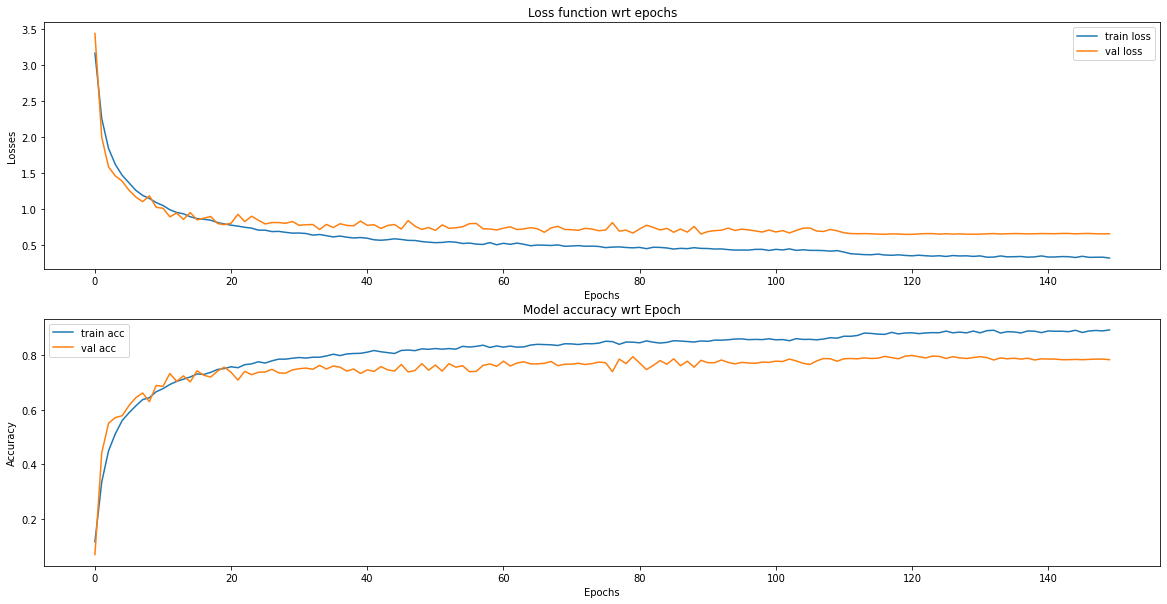

In [ ]:
plot_history(history)

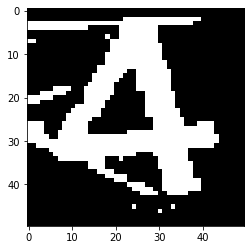

In [ ]:
plt.imshow(X_test[10],cmap='gray')

In [ ]:
from keras.models import load_model
model = load_model('result_model.h5')
pred = model.predict(X_test)

In [ ]:
pred[1]

array([5.5850777e-09, 3.2207407e-08, 3.7586128e-07, 6.3428402e-08,
       1.3534761e-07, 6.2131626e-08, 5.0370157e-04, 6.4884068e-07,
       4.3364713e-07, 9.4128291e-06, 3.8999096e-05, 4.7621575e-06,
       2.2403714e-05, 9.5883788e-06, 1.1098906e-03, 9.5487183e-01,
       1.2169174e-06, 1.9591713e-05, 3.0766819e-07, 7.2193111e-04,
       7.9825859e-06, 4.0886141e-02, 1.6228709e-03, 9.2273491e-05,
       7.5355681e-05], dtype=float32)

In [ ]:
pred = np.argmax(pred, axis = 1)
pred

array([ 8, 15, 11, 20,  9, 14, 10,  2, 10,  7,  1, 19, 22,  5,  7, 14, 11,
       15,  4, 10, 23,  8, 12, 17, 23, 24,  0, 23, 19, 15, 15, 18, 15, 11,
       21, 14, 11, 15, 10,  0,  8, 18, 20, 18, 16, 18, 12,  3, 22, 23,  8,
        6, 15, 17, 20, 24,  5, 15,  4, 15,  4,  8, 12, 10,  6,  0, 20,  5,
       15,  9,  2, 19,  7,  1,  5,  9, 24,  3, 21, 21, 21,  9,  7, 15,  6,
        5, 11, 22, 11, 15, 16,  5,  0, 24,  4,  3, 17, 10, 18, 10,  7, 18,
       22, 16,  5,  1,  9, 17,  0, 12, 19,  0, 21, 14, 10,  5,  1, 12, 14,
       19, 23, 10,  6,  7, 20,  7, 15,  3, 15, 19, 24,  1, 19, 14,  7,  6,
       12, 10, 21, 10, 19,  4, 22, 11,  4, 10, 11, 24, 19,  6, 20, 21, 15,
       12, 14, 18,  2, 20, 22, 13,  6, 23, 14,  1, 11,  8, 11, 16, 13, 19,
       17,  4,  3, 21,  6, 12, 17,  3, 11,  8, 21,  5, 22,  6, 22, 14, 16,
        9, 11, 16,  2, 18,  9,  8,  9,  7, 22,  2,  3, 18, 23, 12, 22, 19,
       17,  5,  5,  3, 13, 16,  1, 21, 18, 16,  3, 10,  1, 16,  6, 19, 12,
        8,  2,  9,  6, 10

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print('Accuracy : ' + str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy : 0.8073394495412844
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        34
           1       0.90      0.77      0.83        35
           2       0.93      0.85      0.89        33
           3       0.87      0.82      0.85        40
           4       0.92      0.77      0.84        30
           5       0.94      0.87      0.90        38
           6       0.68      0.79      0.73        43
           7       0.85      0.88      0.86        32
           8       0.79      0.93      0.85        40
           9       0.94      0.77      0.85        39
          10       0.67      0.79      0.73        39
          11       0.68      0.83      0.75        30
          12       0.61      0.80      0.69        35
          13       0.70      0.90      0.79        21
          14       0.69      0.63      0.66        38
          15       0.71      0.84      0.77        50
          16       0.94      0.70      0.80        

## test mnist model on mnist dataset

In [ ]:
from urllib.request import urlretrieve

urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "mnist-model.h5")
model_mnist = tf.keras.models.load_model("mnist-model.h5")
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


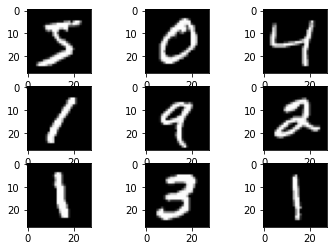

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
X_test.shape[0]

10000

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
pred = model_mnist.predict(X_test)
pred = np.argmax(pred, axis = 1)
print('Accuracy : ' + str(accuracy_score(y_test, pred)))

Accuracy : 0.9833


## fine tune Model by our data

In [ ]:
model2 = Sequential()
for layer in model_mnist.layers[:-1]: # go through until last layer
    layer.trainable=False
    model2.add(layer)
model2.add(Dense(25, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                      

In [ ]:
X,y=preprocessing(path,size=(28,28),flatten=True)

{'8', 'Y', 'N', '3', 'W', 'E', 'C', '4', 'X', 'P', 'T', 'B', 'H', 'M', '5', '9', 'D', 'R', 'U', '6', 'J', 'V', 'K', 'A', 'S'}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.07, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.07, random_state = 1)

In [ ]:
history = model2.fit(X_train, y_train,validation_data = (X_val, y_val),epochs=120)

Epoch 1/120
379/379 [==============================] - 2s 4ms/step - loss: 7.7681 - accuracy: 0.0603 - val_loss: 3.5155 - val_accuracy: 0.1096
Epoch 2/120
379/379 [==============================] - 1s 3ms/step - loss: 4.3636 - accuracy: 0.0885 - val_loss: 2.9540 - val_accuracy: 0.1513
Epoch 3/120
379/379 [==============================] - 1s 4ms/step - loss: 3.1905 - accuracy: 0.1318 - val_loss: 2.8004 - val_accuracy: 0.1930
Epoch 4/120
379/379 [==============================] - 1s 3ms/step - loss: 2.9682 - accuracy: 0.1520 - val_loss: 2.7622 - val_accuracy: 0.2072
Epoch 5/120
379/379 [==============================] - 1s 3ms/step - loss: 2.9261 - accuracy: 0.1582 - val_loss: 2.7807 - val_accuracy: 0.1963
Epoch 6/120
379/379 [==============================] - 2s 4ms/step - loss: 2.9147 - accuracy: 0.1604 - val_loss: 2.7507 - val_accuracy: 0.2072
Epoch 7/120
379/379 [==============================] - 2s 5ms/step - loss: 2.9203 - accuracy: 0.1548 - val_loss: 2.7905 - val_accuracy: 0.1820

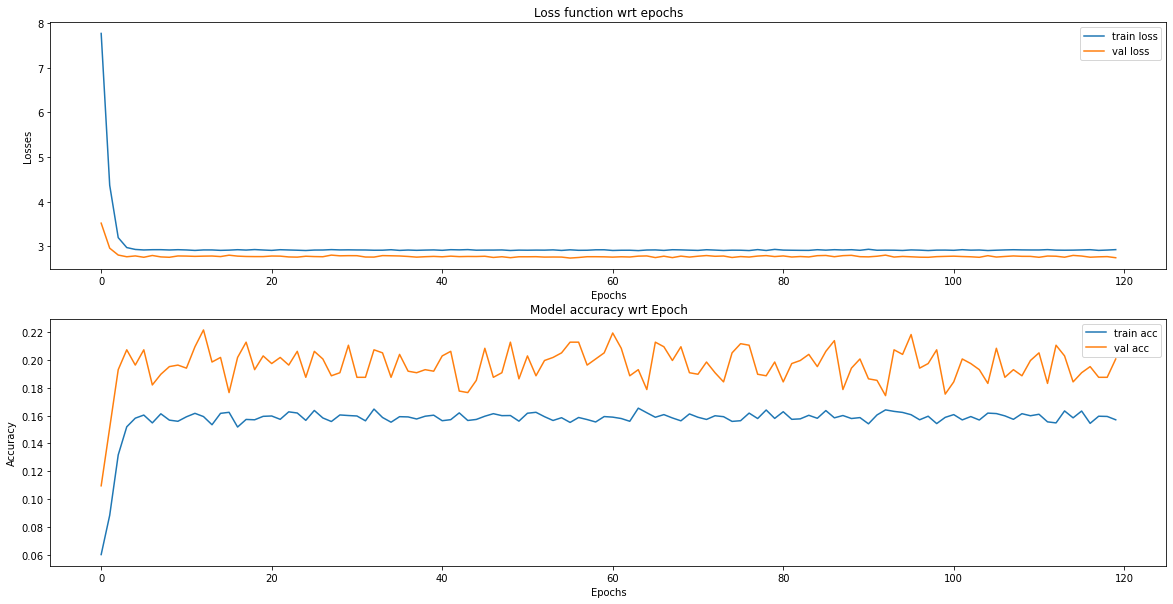

In [ ]:
plot_history(history)

In [ ]:
pred = model2.predict(X_test)
pred = np.argmax(pred, axis = 1)
print('Accuracy : ' + str(accuracy_score(y_test, pred)))

Accuracy : 0.20591233435270132


## q3 the best model for test data 

In [ ]:
model = tf.keras.models.load_model("result_model.h5")


In [ ]:
model4 = Sequential()
model4.add(Input((50,50,1)))
for layer in model.layers[:-1]: # go through until last layer
    print(layer)
    layer.trainable=False
    model4.add(layer)
model4.add(Dense(30, activation='softmax'))
model4.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 25, 25, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 13, 13, 32)        37024     
                                                                 
 sequential_3 (Sequential)   (None, 7, 7, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                25248     
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_9 (Dense)             (None, 30)              

In [ ]:
X,y=preprocessing('./test',size=(50,50),flatten=False)

{'8', '7', 'N', 'Y', '3', 'W', 'L', 'E', 'C', '4', 'F', 'X', 'P', 'B', 'T', 'H', 'M', '5', 'Z', '2', '9', 'Q', 'G', 'D', 'R', '6', 'J', 'A', 'K', 'S'}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 2)

In [ ]:
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val),epochs=700,verbose=1)


Epoch 1/700
4/4 [==============================] - 1s 83ms/step - loss: 4.8938 - accuracy: 0.0315 - val_loss: 4.0509 - val_accuracy: 0.0435
Epoch 2/700
4/4 [==============================] - 0s 15ms/step - loss: 4.5744 - accuracy: 0.0709 - val_loss: 3.9928 - val_accuracy: 0.0435
Epoch 3/700
4/4 [==============================] - 0s 15ms/step - loss: 4.4982 - accuracy: 0.0394 - val_loss: 3.9365 - val_accuracy: 0.0000e+00
Epoch 4/700
4/4 [==============================] - 0s 15ms/step - loss: 4.3813 - accuracy: 0.0709 - val_loss: 3.8796 - val_accuracy: 0.0435
Epoch 5/700
4/4 [==============================] - 0s 15ms/step - loss: 4.2234 - accuracy: 0.0394 - val_loss: 3.8253 - val_accuracy: 0.0435
Epoch 6/700
4/4 [==============================] - 0s 15ms/step - loss: 4.2564 - accuracy: 0.0315 - val_loss: 3.7709 - val_accuracy: 0.0435
Epoch 7/700
4/4 [==============================] - 0s 16ms/step - loss: 4.2066 - accuracy: 0.0394 - val_loss: 3.7202 - val_accuracy: 0.0870
Epoch 8/700
4/4 

In [ ]:
X.shape

(200, 50, 50)

In [ ]:
y.shape

(200,)

In [ ]:
X_train.shape

(127, 50, 50)

In [ ]:
y_train.shape

(127,)

In [ ]:
X_test.shape

(50, 50, 50)

In [ ]:
y_test.shape

(50,)

In [ ]:
X_val.shape

(23, 50, 50)

In [ ]:
y_val.shape

(23,)

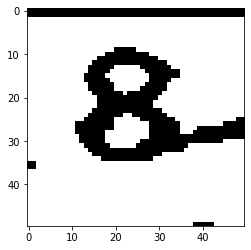

In [ ]:
plt.imshow(X_test[1],cmap='gray')

In [ ]:
y_test[1]

6

In [ ]:
set(y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29}

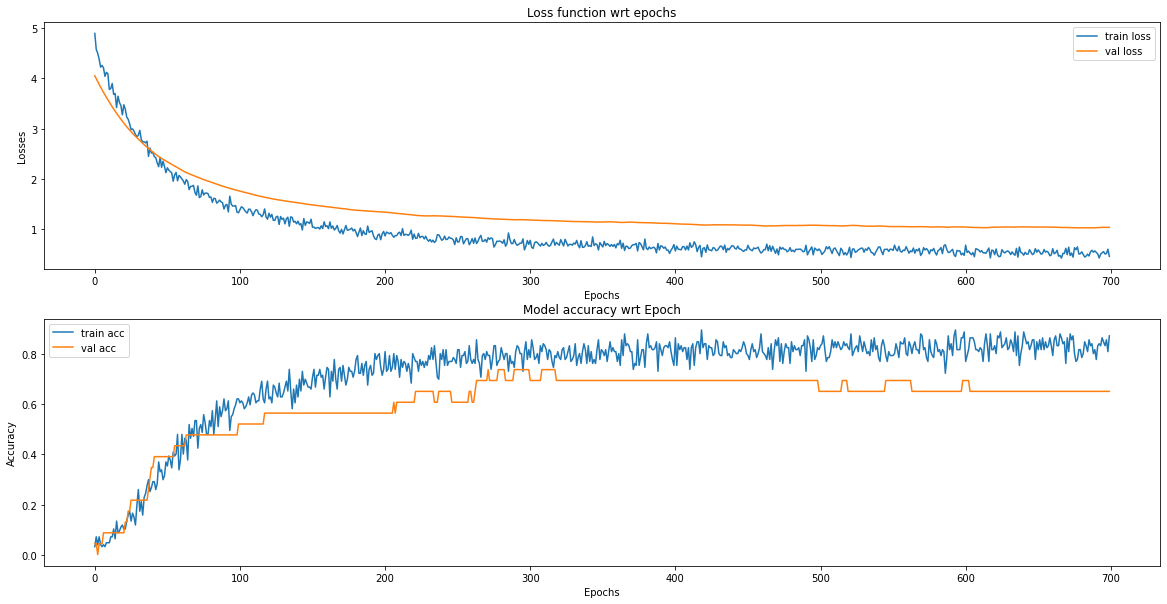

In [ ]:
plot_history(history)

In [ ]:
pred = model4.predict(X_test)
pred = np.argmax(pred, axis = 1)
print('Accuracy : ' + str(accuracy_score(y_test, pred)))

Accuracy : 0.7
